In [2]:
#importing needed packages
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Iris dataset 
includes measurements of iris flowers with four features: sepal length, sepal width, petal length, and petal width.

The target variable is the species of the iris flower, which can be one of three classes:
    Iris-setosa, 
    Iris-versicolor, 
    Iris-virginica

In [3]:
#loading the dataset
data = load_iris()
X = data.data
y = data.target

#Converting to a DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=data.feature_names)
df['species']= y 

In [4]:
# Display the first few rows
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature names:", data.feature_names)
print("Class names:", data.target_names)

Features shape: (150, 4)
Target shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']


In [7]:
#Standarzing the data
scaler = StandardScaler() #standardize your features by removing the mean and scaling to unit variance
X_scaled = scaler.fit_transform(X) #performing it
X_test_scaled = scaler.transform(X_test)

In [6]:
#spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 105
Testing set size: 45


In [11]:
#training the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,zero_division=0)
print("Accuracy on the test set:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy on the test set: 0.5111111111111111
Confusion Matrix:
[[19  0  0]
 [ 9  4  0]
 [ 3 10  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        19
           1       0.29      0.31      0.30        13
           2       0.00      0.00      0.00        13

    accuracy                           0.51        45
   macro avg       0.30      0.44      0.35        45
weighted avg       0.34      0.51      0.41        45



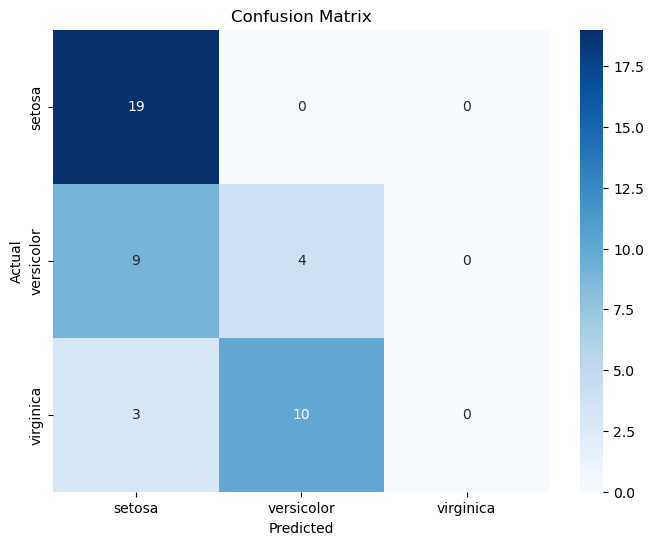

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
#annot=True: Adds annotations (i.e., the numeric values) to each cell in the heatmap
#fmt='d': Formats the annotations as integers ('d' stands for "decimal integer")
#xticklabels=data.target_names and yticklabels=data.target_names:Labels the x-axis and y-axis with the target class names
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
cv_results = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_results)
print("Mean cross-validation score:", cv_results.mean())

Cross-validation scores: [0.96666667 1.         0.93333333 0.9        1.        ]
Mean cross-validation score: 0.9600000000000002


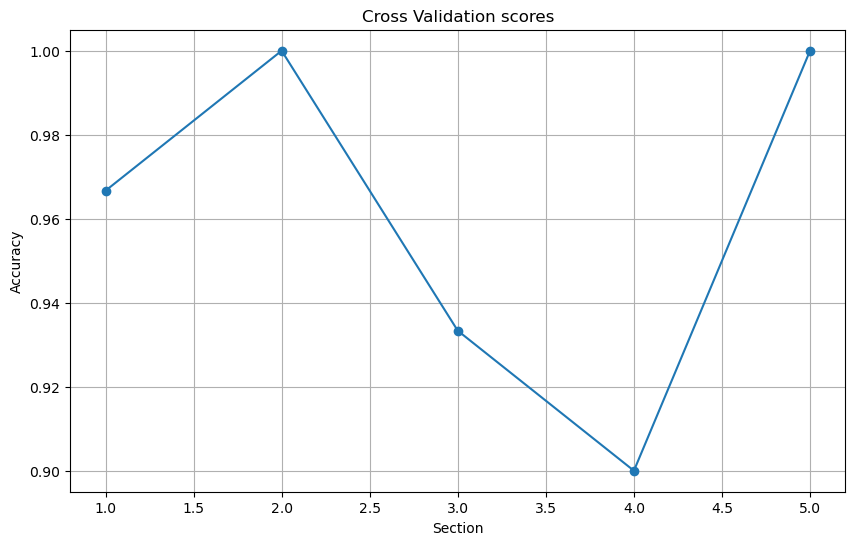

In [18]:
#plot the results
plt.figure(figsize=(10,6))
plt.plot(range(1,len(cv_results)+1), cv_results, marker='o')
plt.title("Cross Validation scores")
plt.xlabel('Section')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()